In [1]:
from __future__ import annotations
import itertools
import os
import numpy as np
import matplotlib.pyplot as plt
import getdist
import getdist.plots as gdplt
from pathlib import Path
from typing import Any, cast
from matplotlib.cm import tab10  # type: ignore
from cobaya import get_model
from eftpipe.reader import read_pkl

In [2]:
os.chdir("../")

In [3]:
from script.mkbestfit import main as mkbestfit
from script.mkbestfit import extract_sampled_bestfit

In [4]:
plt.rcParams["text.usetex"] = True
GREY = tab10.colors[-3]
BLUE = tab10.colors[0]
ORANGE = tab10.colors[1]
GREEN = tab10.colors[2]
RED = tab10.colors[3]

In [5]:
def add_markers(
    g: gdplt.GetDistPlotter,
    markers: dict[str, float],
    marker_args: dict[str, Any] = {"c": "k", "ls": "--", "lw": 1},
    all_params: list[str] | None = None
):
    for name, value in markers.items():
        if ax := g.get_axes_for_params(name):
            ax.axvline(value, **marker_args)
    if all_params:
        all_params = all_params + list(markers.keys())
        all_params = list(set(all_params))
        for xname, xvalue in markers.items():
            for yname in all_params:
                if ax := g.get_axes_for_params(xname, yname):
                    ax.axvline(xvalue, **marker_args)
        for yname, yvalue in markers.items():
            for xname in all_params:
                if ax := g.get_axes_for_params(xname, yname):
                    ax.axhline(yvalue, **marker_args)
        return
    for (xname, xvalue), (yname, yvalue) in itertools.permutations(markers.items(), 2):
        if ax := g.get_axes_for_params(xname, yname):
            ax.axvline(xvalue, **marker_args)
            ax.axhline(yvalue, **marker_args)

def add_bestfit(
    g: gdplt.GetDistPlotter, bestfit: dict[str, float], color
):
    for (xname, xvalue), (yname, yvalue) in itertools.permutations(bestfit.items(), 2):
        if ax := g.get_axes_for_params(xname, yname):
            ax.scatter(xvalue, yvalue, color=color, marker="x")

In [6]:
pathlist = [
    "cobaya/chains/v1_Arnaud_ELG_NGC_l024_kmax0.25",
    "cobaya/chains/v1_Arnaud_ELG_SGC_l024_kmax0.25",
    "cobaya/chains/v1_Arnaud_ELG_NS_l024_kmax0.25",
    "cobaya/chains/v1_Arnaud_ELG_NS_l024_kmax0.20",
    "cobaya/chains/v1_Arnaud_ELG_NS_l024_kmax0.25_nofc",
]
names = [
    "NGC.0p25",
    "SGC.0p25",
    "NS.0p25",
    "NS.0p20",
    "NS.0p25.nofc",
]
settings = {"ignore_rows": 0.3}
samples = {
    k: getdist.loadMCSamples(
        path,
        settings=settings if k != "NGC.0p25" else {"ignore_rows": 0.7},
    )
    for k, path in zip(names, pathlist)
}
bestfits = {
    k: extract_sampled_bestfit(path + ".minimum", False)
    for k, path in zip(names, pathlist)
}
rafa = getdist.loadMCSamples(
    "cobaya/chains/v1_Rafa_Arnaud_ELG_NS_l02_kmax0.20",
    settings=settings,
)
rafa_bestfit = extract_sampled_bestfit(
    "cobaya/chains/v1_Rafa_Arnaud_ELG_NS_l02_kmax0.20.minimum",
    False,
)

In [7]:
param_limits = {
    "omegam": (0.1001, 0.4999),
    "sigma8": (0.3001, 0.8999),
    "H0": (60.001, 99.999),
}

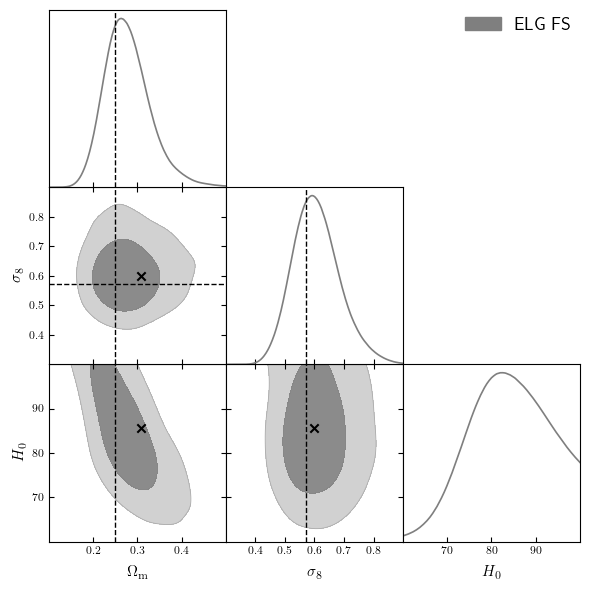

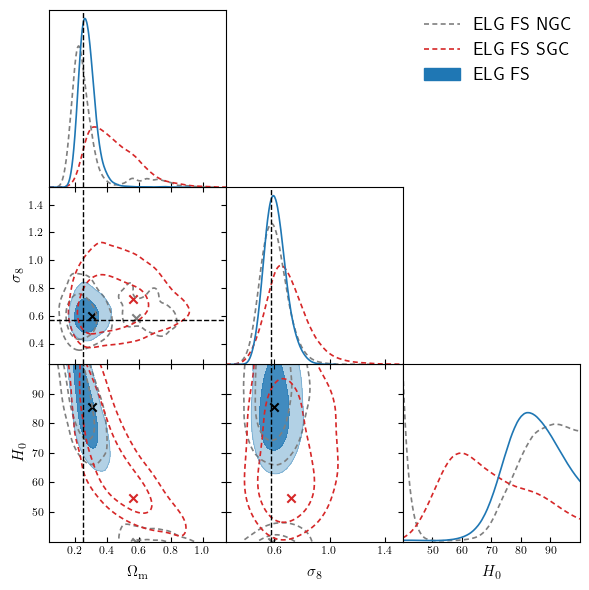

In [8]:
g = gdplt.get_subplot_plotter(width_inch=6)
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 16
g.settings.figure_legend_loc = "upper right"
params = ["omegam", "sigma8", "H0"]
roots = [samples["NS.0p25"]]
roots_bestfit = [bestfits["NS.0p25"]]
colors = [GREY]
g.triangle_plot(
    roots, params,
    filled=[True],
    legend_labels=["ELG FS"],
    diag1d_kwargs={"normalized": True},
    contour_colors=colors,
    contour_lws=1.2,
    contour_args=[{"alpha": 0.9}],
    param_limits=param_limits,
)
add_bestfit(g, roots_bestfit[0], "k")
add_markers(
    g,
    {
        "omegam": 0.2486,
        "sigma8": 0.5724,
    },
    all_params=params,
)
plt.show()

g = gdplt.get_subplot_plotter(width_inch=6)
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 16
g.settings.figure_legend_loc = "upper right"
params = ["omegam", "sigma8", "H0"]
roots = [samples["NGC.0p25"], samples["SGC.0p25"], samples["NS.0p25"]]
roots_bestfit = [bestfits["NGC.0p25"], bestfits["SGC.0p25"], bestfits["NS.0p25"]]
colors = [GREY, RED, BLUE]
g.triangle_plot(
    roots, params,
    filled=[False, False, True],
    legend_labels=["ELG FS NGC", "ELG FS SGC", "ELG FS"],
    diag1d_kwargs={"normalized": True},
    contour_colors=colors,
    contour_lws=1.2,
    # contour_args=[{}, {}, {"alpha": 0.9}],
    contour_ls=["--", "--", "-"],
)
for b, c in zip(
    roots_bestfit,
    [GREY, RED, "k"],
):
    add_bestfit(g, b, c)
add_markers(
    g,
    {
        "omegam": 0.2486,
        "sigma8": 0.5724,
    },
    all_params=params,
)
plt.show()

[eftpipe.eftlss.elg_ngc.apeffect] *WARNING* rdrag_AP or h_AP or bird.rdrag or bird.h not given, fallback to qperp and qpara


[eftpipe.eftlss.elg_sgc.apeffect] *WARNING* rdrag_AP or h_AP or bird.rdrag or bird.h not given, fallback to qperp and qpara
bestfit:
{'ELG_NGC_b1': 1.890131288,
 'ELG_NGC_b3': 0.03378356722115276,
 'ELG_NGC_c2': 2.27717871,
 'ELG_NGC_cct': 0.425700601742934,
 'ELG_NGC_ce0': -0.15212966045729856,
 'ELG_NGC_cemono': 0.05487009194754475,
 'ELG_NGC_cequad': -0.8913703843934245,
 'ELG_NGC_cr1': 1.6731742606926723,
 'ELG_NGC_cr2': -1.3992380138603455,
 'ELG_SGC_b1': 1.821928817,
 'ELG_SGC_b3': -0.0402591087196955,
 'ELG_SGC_c2': 0.1230052478,
 'ELG_SGC_cct': -0.044784109952261515,
 'ELG_SGC_ce0': 0.1798926929826984,
 'ELG_SGC_cemono': 0.15825921078687202,
 'ELG_SGC_cequad': -0.3405031023043182,
 'ELG_SGC_cr1': -0.5468235851962872,
 'ELG_SGC_cr2': 1.625158707071569,
 'H0': 85.5905564,
 'logA': 2.180351034,
 'mnu': 1.0,
 'ns': 0.87,
 'omegabh2': 0.02294788818,
 'omegach2': 0.1918270301}


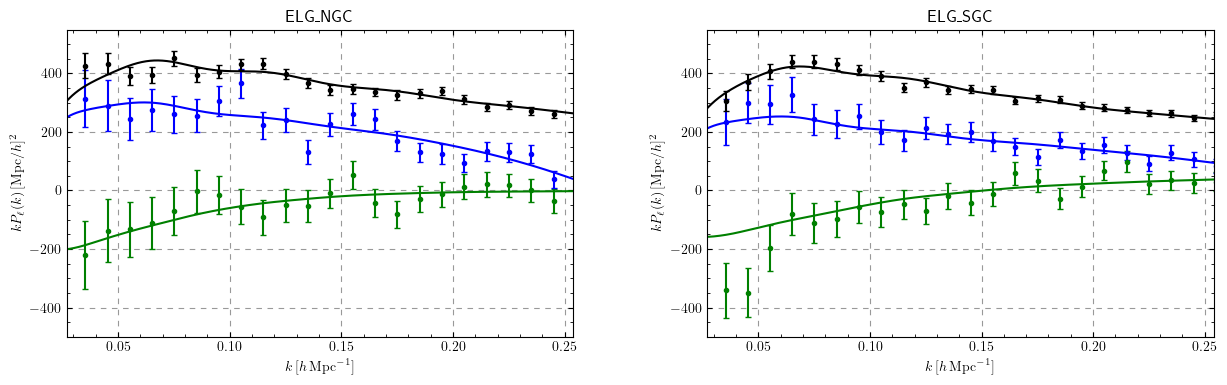

In [10]:
cmd = (
    "--likelihoods ELG_NGC ELG_SGC "
    "--tracers ELG_NGC ELG_SGC --base "
    "cobaya cobaya/chains/v1_Arnaud_ELG_NS_l024_kmax0.25.input.yaml "
    "--hex ELG_NGC ELG_SGC"
)
fig, axes = mkbestfit(cmd.split())
fig.set_size_inches((13, 4))
axes[0].set_xlim(0.027, 0.254)
axes[0].set_ylim(-499, 549)
axes[1].set_xlim(0.027, 0.254)
axes[1].set_ylim(-499, 549)
for ax in axes:
    ax.minorticks_on()
    ax.tick_params(which="both", direction="in", top=True, right=True)
    ax.grid(color="grey", alpha=0.8, ls=(0, (5, 5)))
    ax.set_xlabel(R"$k\,[h\,\mathrm{Mpc}^{-1}]$")
    ax.set_ylabel(R"$kP_\ell(k)\,[\mathrm{Mpc}/h]^2$")
plt.show()

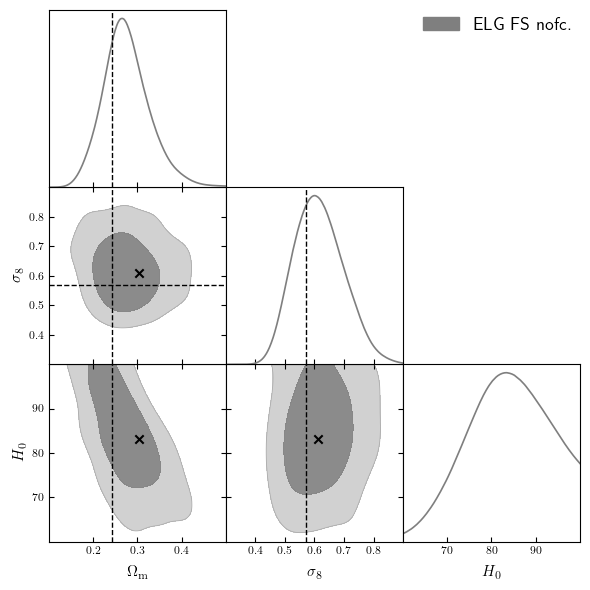

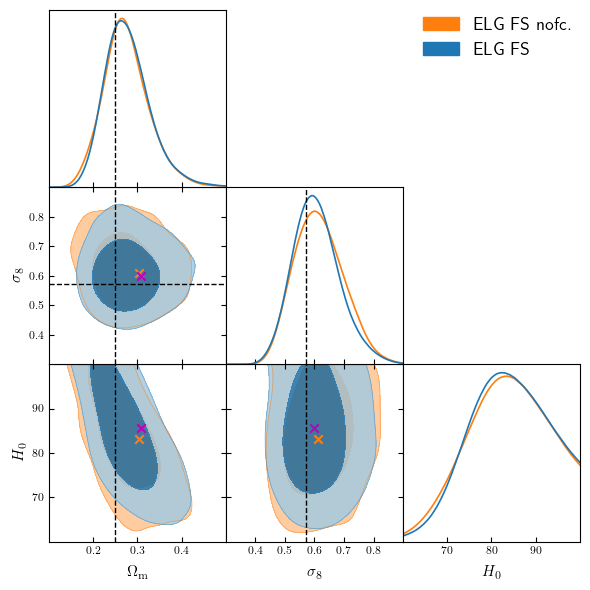

In [52]:
g = gdplt.get_subplot_plotter(width_inch=6)
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 16
g.settings.figure_legend_loc = "upper right"
params = ["omegam", "sigma8", "H0"]
roots = [samples["NS.0p25.nofc"]]
roots_bestfit = [bestfits["NS.0p25.nofc"]]
colors = [GREY]
g.triangle_plot(
    roots, params,
    filled=[True],
    legend_labels=["ELG FS nofc."],
    diag1d_kwargs={"normalized": True},
    contour_colors=colors,
    contour_lws=1.2,
    contour_args=[{"alpha": 0.9}],
    param_limits=param_limits,
)
add_bestfit(g, roots_bestfit[0], "k")
add_markers(
    g,
    {
        "omegam": 0.2426,
        "sigma8": 0.5698,
    },
    all_params=params,
)
plt.show()

# ----------------------------------------
g = gdplt.get_subplot_plotter(width_inch=6)
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 16
g.settings.figure_legend_loc = "upper right"
params = ["omegam", "sigma8", "H0"]
roots = [samples["NS.0p25.nofc"], samples["NS.0p25"]]
roots_bestfit = [bestfits["NS.0p25.nofc"], bestfits["NS.0p25"]]
colors = [ORANGE, BLUE]
g.triangle_plot(
    roots, params,
    filled=[True, True],
    legend_labels=["ELG FS nofc.", "ELG FS"],
    diag1d_kwargs={"normalized": True},
    contour_colors=colors,
    contour_lws=1.2,
    param_limits=param_limits,
)
for b, c in zip(
    roots_bestfit,
    [ORANGE, "m"],
):
    add_bestfit(g, b, c)
add_markers(
    g,
    {
        "omegam": 0.2486,
        "sigma8": 0.5724,
    },
    all_params=params,
)
plt.show()

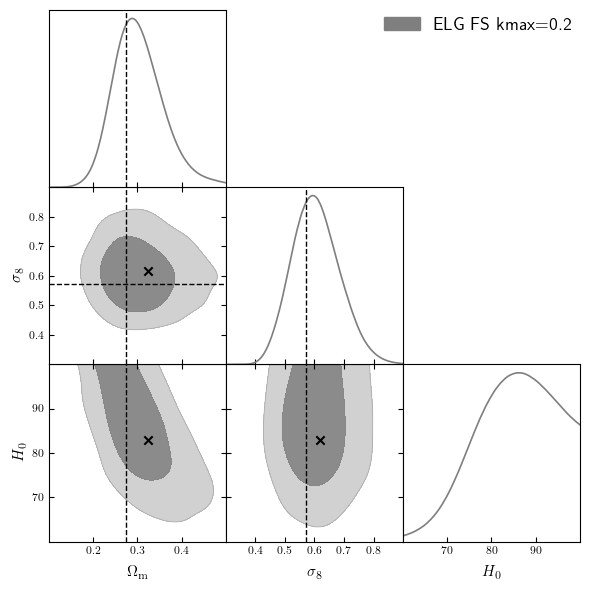

In [59]:
g = gdplt.get_subplot_plotter(width_inch=6)
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 16
g.settings.figure_legend_loc = "upper right"
params = ["omegam", "sigma8", "H0"]
roots = [samples["NS.0p20"]]
roots_bestfit = [bestfits["NS.0p20"]]
colors = [GREY]
g.triangle_plot(
    roots, params,
    filled=[True],
    legend_labels=["ELG FS kmax=0.2"],
    diag1d_kwargs={"normalized": True},
    contour_colors=colors,
    contour_lws=1.2,
    contour_args=[{"alpha": 0.9}],
    param_limits=param_limits,
)
add_bestfit(g, roots_bestfit[0], "k")
add_markers(
    g,
    {
        "omegam": 0.2742,
        "sigma8": 0.5725,
    },
    all_params=params,
)
plt.show()

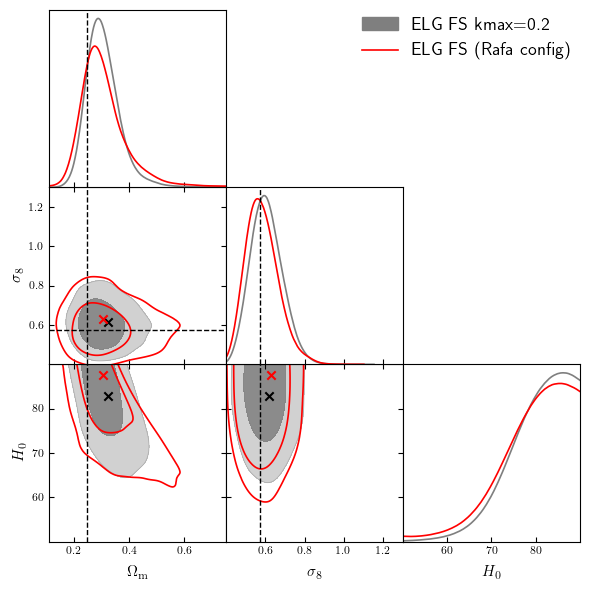

In [62]:
g = gdplt.get_subplot_plotter(width_inch=6)
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 16
g.settings.figure_legend_loc = "upper right"
params = ["omegam", "sigma8", "H0"]
roots = [samples["NS.0p20"], rafa]
roots_bestfit = [bestfits["NS.0p20"], rafa_bestfit]
g.triangle_plot(
    roots, params,
    filled=[True, False],
    legend_labels=["ELG FS kmax=0.2", "ELG FS (Rafa config)"],
    diag1d_kwargs={"normalized": True},
    contour_colors=[GREY, "r"],
    contour_lws=1.2,
    contour_args=[{"alpha": 0.9}, {}],
    param_limits={
        "omegam": (0.11, 0.75),
        "sigma8": (0.4, 1.3),
        "H0": (50, 90),
    },
)
for b, c in zip([roots_bestfit[0], rafa_bestfit], ["k", "r"]):
    add_bestfit(g, b, c)
add_markers(
    g,
    {
        "omegam": 0.2486,
        "sigma8": 0.5724,
    },
    all_params=params,
)
plt.show()